## Linear Regression

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size =15)
plt.rc('axes', labelsize= 15)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 15)

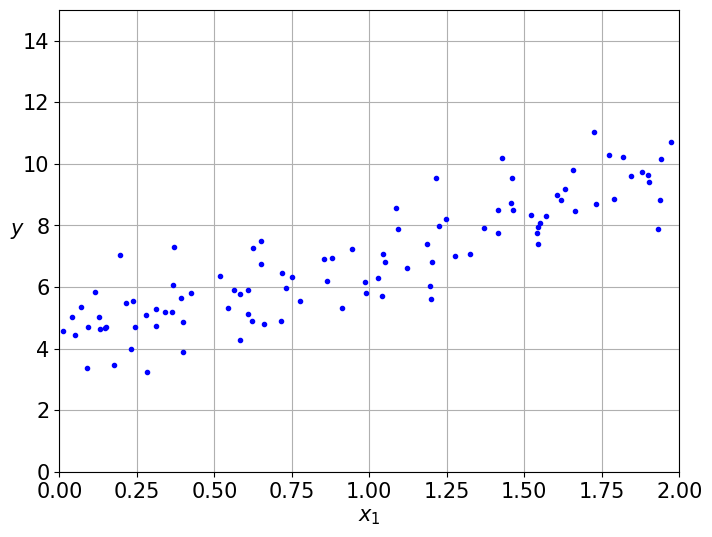

In [4]:
plt.figure(figsize=(8,6))
plt.plot(X,y ,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
best_theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(best_theta)

[[4.21509616]
 [2.77011339]]


In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict =X_new_b@best_theta

y_predict

array([[4.21509616],
       [9.75532293]])

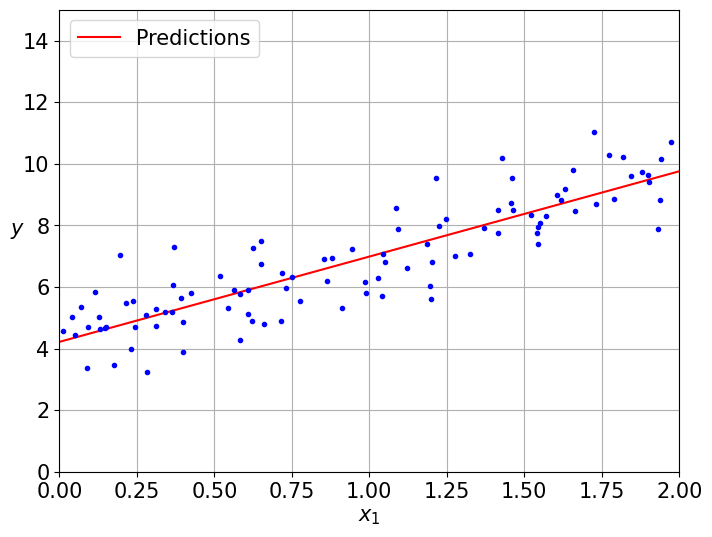

In [7]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[4.21509616],
       [9.75532293]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
residuals ## the lower the better

array([80.6584564])

In [11]:
rank ## number of independent features

np.int32(2)

## Gradient Descent


In [12]:
eta = 0.03  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21507295],
       [2.77013388]])

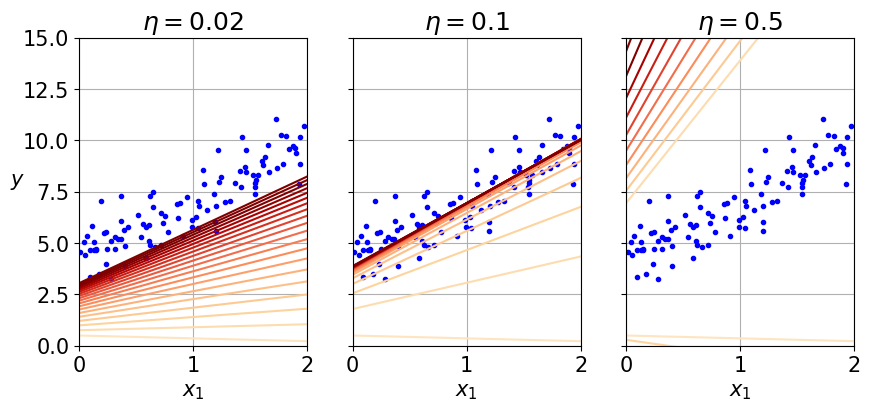

In [14]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

finding best learning rate for SGD using GridSearchCV

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'eta0': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y.ravel())
grid_search.best_params_

{'eta0': 0.03}

## Stochastic Gradient Descent

In [16]:
theta_path_sg = []

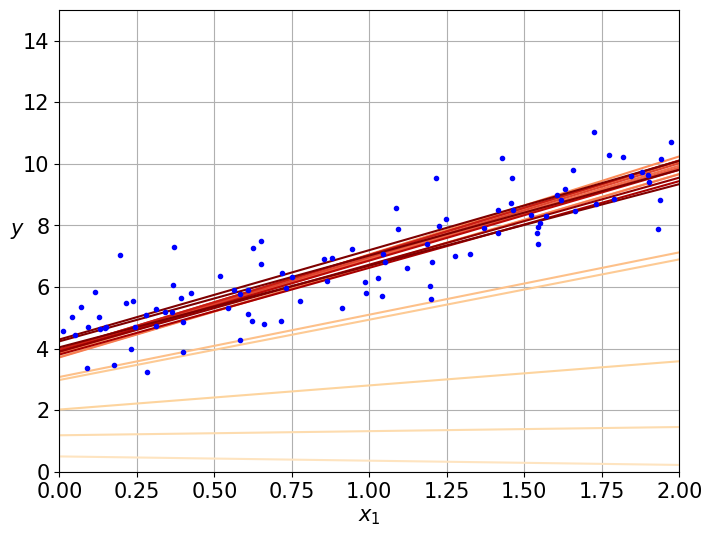

In [17]:
n_epochs= 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

n_shown = 20
plt.figure(figsize=(8,6))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch ==0 and iteration< n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
     
        random_index = np.random.randint(m)  
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients =  2* xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sg.append(theta) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()          

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-5, learning_rate="constant", eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1215872]), array([2.68566488]))

## Mini Batch Gradient Descent

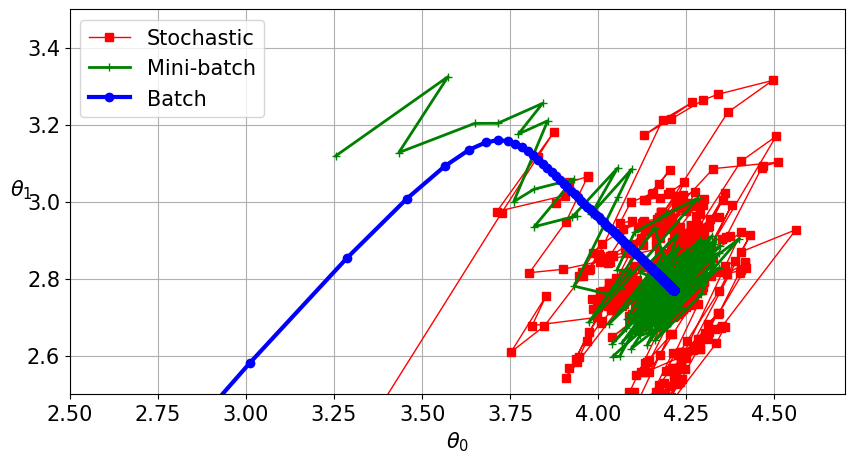

In [20]:
from math import ceil

n_epochs =50 
minibatch_size =20
n_batches_per_epoch = ceil(m / minibatch_size)
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200,1000

def learning_schedule(t):
    return t0 / (t+t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):

      idx = iteration * minibatch_size
      xi = X_b_shuffled[idx : idx + minibatch_size]
      yi = y_shuffled[idx : idx + minibatch_size]
      gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
      eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
      theta = theta - eta * gradients
      theta_path_mgd.append(theta)
         
         
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sg = np.array(theta_path_sg)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(10,5))
plt.plot(theta_path_sg[:, 0], theta_path_sg[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.7, 2.5, 3.5])
plt.grid()
plt.legend(loc="upper left")
plt.show()

## Polynomial Regression


In [21]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

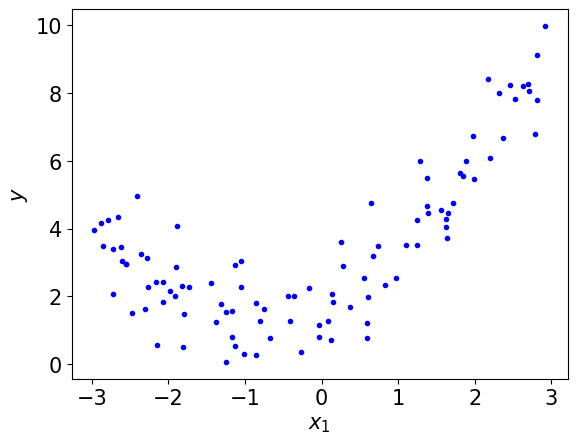

In [22]:
m= 100
X= 6*np.random.rand(m,1) - 3
y= 0.5*X**2 + X + 2 + rnd.randn(m,1) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_features.fit_transform(X)


In [24]:
X[0]

array([-0.75275929])

In [25]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

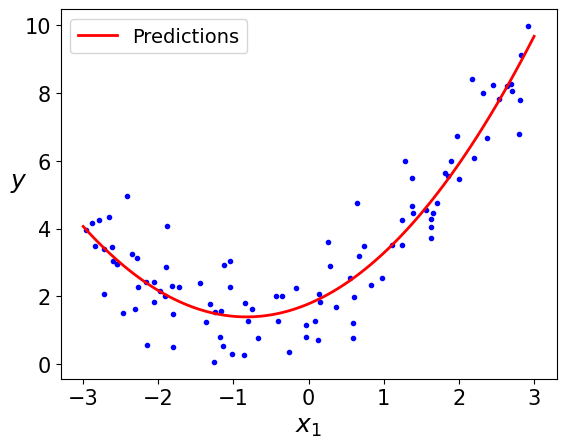

In [27]:
X_new = np.linspace(-3, 3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label= 'Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

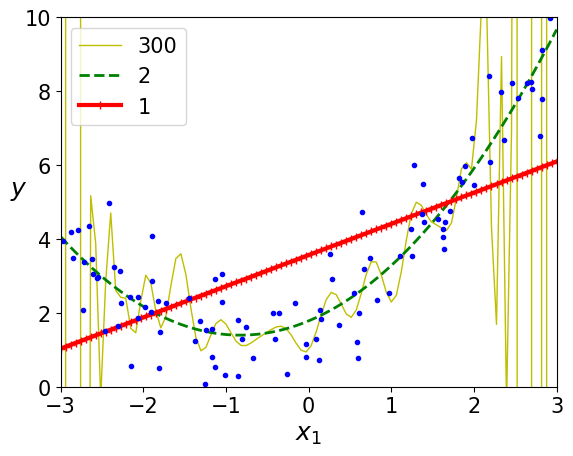

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (('y-', 1, 300), ('g--',2, 2),("r-+", 3, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', poly_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
      ])
    polynomial_regression.fit(X, y)
    y_new_big = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_big, style, label=str(degree), linewidth= width)



plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Learning Curve

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2,random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)+1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", label="Train")
    plt.plot(np.sqrt(val_errors), "b-", label="Val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.axis([0,80,0,3])
    plt.title("Learning Curves")
    plt.show()

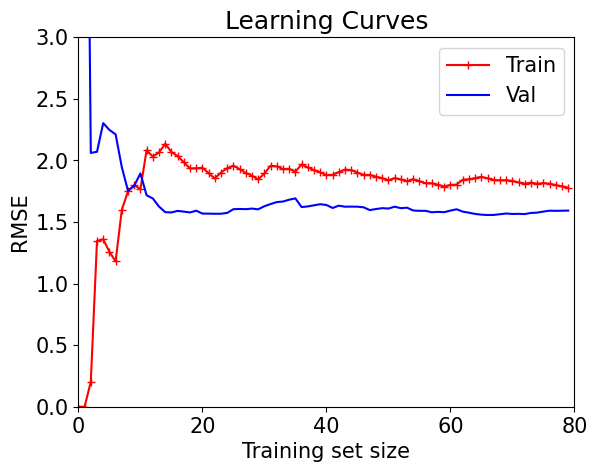

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)



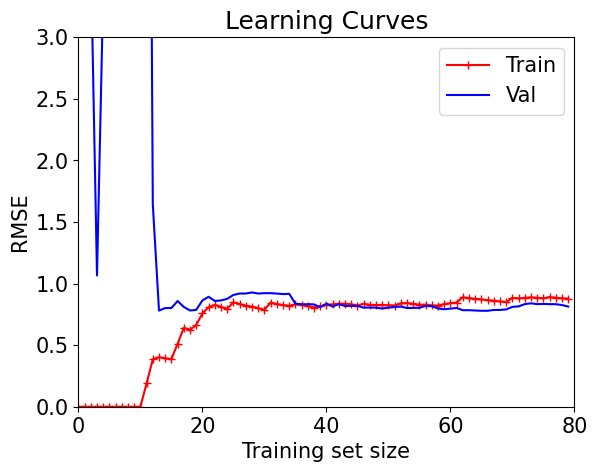

In [31]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
  ])

plot_learning_curves(polynomial_regression, X, y)


## Regularized Linear Models


## Ridge Regression

In [32]:
np.random.seed(42)
m= 20
X= 3*np.random.rand(m,1)
y = 0.5 * X + np.random.randn(m,1)/1.5

X_new = np.linspace(0,3,100).reshape(100,1)

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver= 'cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([0.55071465])

In [34]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([0.55072189])

In [35]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree= 10, include_bias= False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model),
            ])
        model.fit(X,y)
        y_new = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new, style, linewidth= lw, label= f"$\\alpha={alpha}$")
    plt.plot(X, y, 'b.')
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.legend(loc="upper left")    
    plt.axis([0,3,0,4])

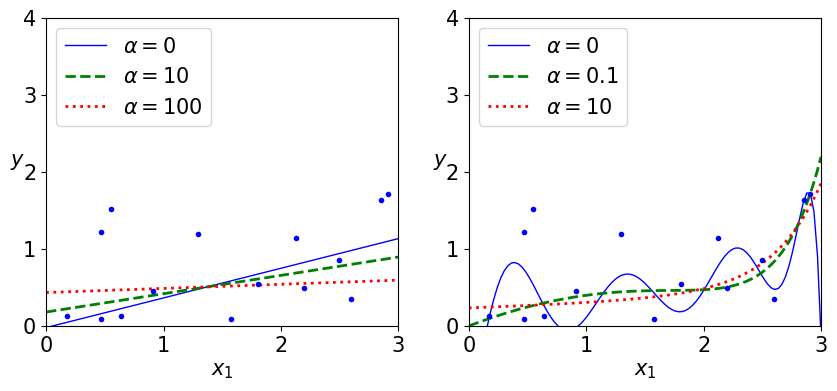

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial= False, alphas=[0, 10, 100])
plt.subplot(122)
plot_model(Ridge, polynomial= True, alphas=[0, 0.1, 10, 1000])
plt.show()

In [37]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([0.55405607])

## Lasso Regression

C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


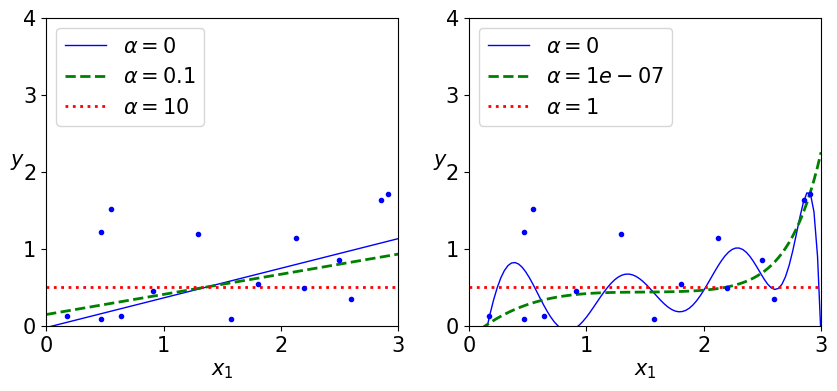

In [38]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial= False, alphas=[0, 0.1, 10])
plt.subplot(122)
plot_model(Lasso, polynomial= True, alphas=[0, 10**-7, 1])

plt.show()

In [39]:
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([0.53788174])

## Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([0.54333232])

## Early Stopping

In [41]:
from sklearn.metrics import root_mean_squared_error

C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was pass

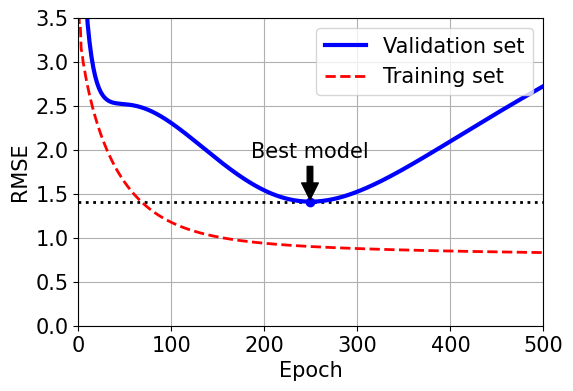

In [42]:
from sklearn.pipeline import make_pipeline 
from copy import deepcopy 
np.random.seed(42)
m=100
X= 6*np.random.rand(m,1)-3
y= 0.5*X**2 + X + 2+ np.random.randn(m,1)
X_train, y_train = X[:m//2], y[:m//2]
X_val, y_val = X[m//2:], y[m//2:]

preprocessing = make_pipeline(PolynomialFeatures(degree= 90, include_bias= False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_val)

sgd_reg = SGDRegressor(penalty=None, eta0= 0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [],[]

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_val, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    
    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()


## Logistic Regression

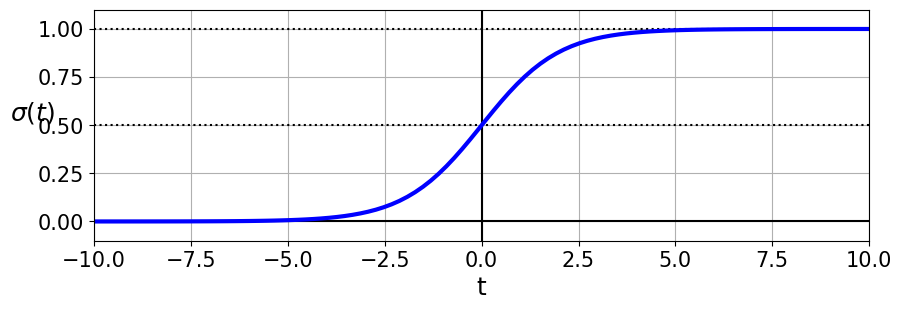

In [43]:
t= np.linspace(-10,10,100)
sig = 1/ (1 + np.exp(-t))

plt.figure(figsize=(10,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=3)
plt.xlabel("t", fontsize=18)
plt.ylabel(r"$\sigma(t)$", fontsize=18, rotation=0)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid()

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [45]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [46]:
X= iris['data'][:, 3:]
y= (iris['target']==2).astype(int)

In [47]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


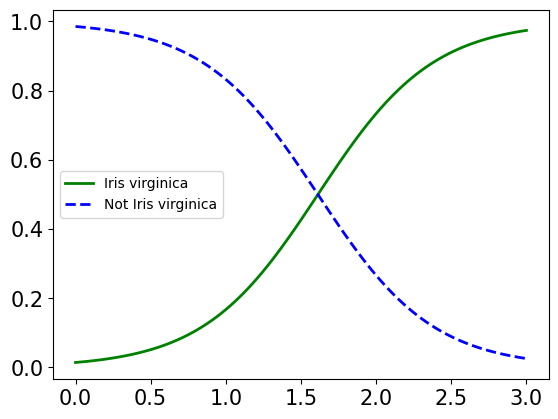

In [48]:
X_new = np.linspace(0,3,100).reshape(100,1)
y_pred_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_pred_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_pred_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend(loc="center left", fontsize=10)

a bit fancy fig

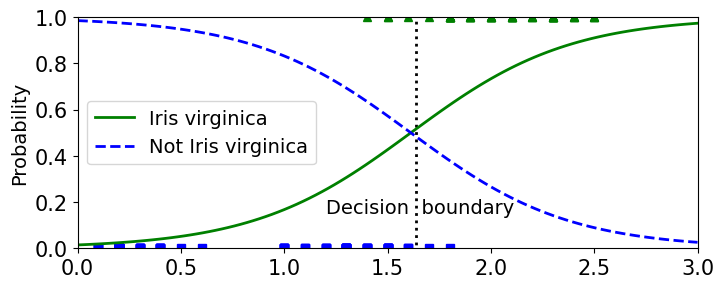

In [49]:
X_new = np.linspace(0,3,100).reshape(100,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, 0, 1])

plt.show()

In [50]:
decision_boundary

array([1.63636364])

In [51]:
log_reg.predict([[2], [1.49999]])

array([1, 0])

(np.float64(2.9), np.float64(7.0), np.float64(0.8), np.float64(2.7))

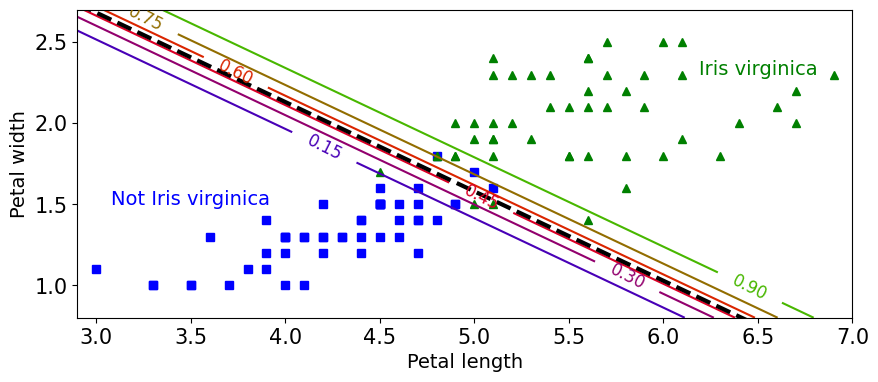

In [52]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])


In [53]:
X = iris["data"][:, (2, 3)] 
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

C:\Users\hasin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


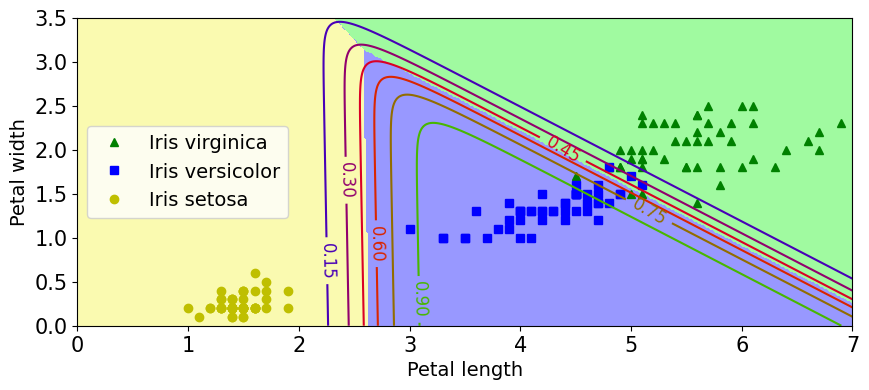

In [54]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [55]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626370e-07, 5.73689802e-02, 9.42630398e-01]])

EXCERCISE 12.

In [57]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [58]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [62]:
np.random.seed(42)

In [63]:
test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
val_size = int(total_size * val_ratio)
train_size = total_size - test_size - val_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-test_size]]
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

 OHE from scratch :D

In [64]:
def to_one_hot (y):
    n_classes = y.max() + 1
    m= len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [65]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [66]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [68]:
Y_train_one_hot = to_one_hot(y_train)
Y_val_one_hot = to_one_hot(y_val)
Y_test_one_hot = to_one_hot(y_test)

softmax from scratch :D


In [69]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sum = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sum

In [71]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train)) 

In [72]:
eta = 0.01
n_iterations = 5000
m= len(X_train)
epsilon = 1e-7  

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits= X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500==0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        print(f"Iteration {iteration}: Loss = {loss}")
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradients

Iteration 0: Loss = 3.5356045081790177
Iteration 500: Loss = 0.7698276617097016
Iteration 1000: Loss = 0.6394784332731978
Iteration 1500: Loss = 0.5618741363839648
Iteration 2000: Loss = 0.5095831080853221
Iteration 2500: Loss = 0.47127377559909306
Iteration 3000: Loss = 0.44155863305230325
Iteration 3500: Loss = 0.41755986648041216
Iteration 4000: Loss = 0.3975941721521857
Iteration 4500: Loss = 0.38060484552797946


In [74]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_val_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_val_predict == y_val)
accuracy_score

np.float64(0.9333333333333333)

lets try adding l2 penalty

In [82]:
eta = 0.01
n_iterations = 5001
m= len(X_train)
epsilon = 1e-7  
alpha= 0.1

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits= X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500==0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(theta[1:]))
        total_loss = loss + alpha * l2_loss
        print(f"Iteration {iteration}: Loss = {loss}, L2 Loss = {l2_loss}, Total Loss = {total_loss}")
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

Iteration 0: Loss = 1.3349470459772936, L2 Loss = 1.4025534956070365, Total Loss = 1.4752023955379974
Iteration 500: Loss = 0.7225415871747093, L2 Loss = 0.49168851945660663, Total Loss = 0.77171043912037
Iteration 1000: Loss = 0.6138980463708349, L2 Loss = 0.36571080882984647, Total Loss = 0.6504691272538196
Iteration 1500: Loss = 0.5568394832763077, L2 Loss = 0.4155628930643411, Total Loss = 0.5983957725827418
Iteration 2000: Loss = 0.5217085260163911, L2 Loss = 0.489700910300466, Total Loss = 0.5706786170464376
Iteration 2500: Loss = 0.4975413543479087, L2 Loss = 0.5568680380273652, Total Loss = 0.5532281581506452
Iteration 3000: Loss = 0.47960049518530956, L2 Loss = 0.6135800389325301, Total Loss = 0.5409584990785625
Iteration 3500: Loss = 0.46555396784576036, L2 Loss = 0.6617242790339977, Total Loss = 0.5317263957491601
Iteration 4000: Loss = 0.45413059457537375, L2 Loss = 0.7034818268618382, Total Loss = 0.5244787772615576
Iteration 4500: Loss = 0.4445790180718684, L2 Loss = 0.74

In [83]:
logits = X_val.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

np.float64(0.9666666666666667)

In [85]:
eta = 0.01 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha=0.1
best_loss = np.inf

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) +np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta*gradients

    logits = X_val.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_val_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss= xentropy_loss + alpha*l2_loss

    if iteration % 500==0:
        print(f"Iteration {iteration}: Validation Loss = {loss}")
    if loss < best_loss:
        best_loss = loss
    else: 
        print(f"Early stopping at iteration {iteration}")
        break

Iteration 0: Validation Loss = 5.1561500441038115
Iteration 500: Validation Loss = 0.9164434474731102
Iteration 1000: Validation Loss = 0.7796445432355362
Iteration 1500: Validation Loss = 0.7077997850330491
Iteration 2000: Validation Loss = 0.6656029369855664
Iteration 2500: Validation Loss = 0.6383901297301458
Iteration 3000: Validation Loss = 0.6194989388239278
Iteration 3500: Validation Loss = 0.605622184801625
Iteration 4000: Validation Loss = 0.5949818109269516
Iteration 4500: Validation Loss = 0.5865520810434708
Iteration 5000: Validation Loss = 0.5797039418768831


In [87]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

np.float64(0.9333333333333333)

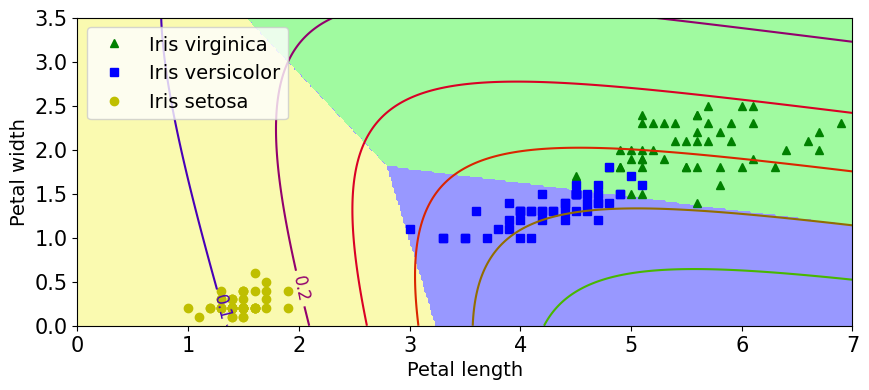

In [89]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [91]:
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9666666666666667)